In [6]:
import itertools
import imageio

def run_episode(env, model, render=False, record=False):
    images = []
    obs = env.reset()
    for t in itertools.count():
        if record:
            images.append(env.render(mode='rgb_array'))
        if render:
            env.render()
        action = model.act(obs)
        obs, reward, done, info = env.step(action)
        if done:
            print("Score: " + str(t + 1))
            env.close()
            break
            
    if record:
        imageio.mimsave('cartpole.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)

In [7]:
import gym

env = gym.make("CartPole-v1")
env.seed(0)

[0]

In [8]:
from td_actor_critic import TDActorCritic
from a2c import A2C

actor = A2C(env)

In [9]:
def train(env, actor, episodes=100):
    returns = []
    mean = 0
    for episode in range(1, episodes+1):
        obs = env.reset()
        score = 0
        for t in itertools.count():
            action = actor.act(obs)
            obs2, reward, done, _ = env.step(action)
            actor.remember(obs, action, reward, obs2, done)
            actor.train()
            obs = obs2
            score += reward
            if done:
                returns.append(score)
                mean += score/10
                if episode % 10 == 0:
                    print("Episode: " + str(episode) + ", Mean Score: " + str(mean))
                    if mean > 450:
                        return returns
                    mean = 0
                break
    
    return returns

In [10]:
returns = train(env, actor, episodes=300)

Episode: 10, Mean Score: 18.9
Episode: 20, Mean Score: 19.699999999999996
Episode: 30, Mean Score: 53.5
Episode: 40, Mean Score: 43.9
Episode: 50, Mean Score: 69.5
Episode: 60, Mean Score: 173.29999999999998
Episode: 70, Mean Score: 144.7
Episode: 80, Mean Score: 305.6
Episode: 90, Mean Score: 245.80000000000004
Episode: 100, Mean Score: 344.20000000000005
Episode: 110, Mean Score: 419.3


In [11]:
run_episode(env, actor, render=True)

Score: 500


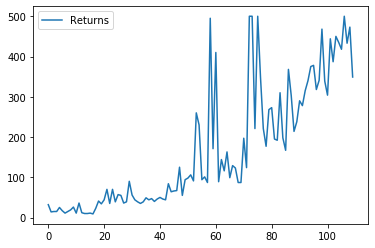

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(len(returns)), returns, label='Returns')
plt.legend()
plt.show()